<h1>Model Comparisons</h1>
<p>This notebooks shows the final dataset for the project and compares canidinate models.</p>

<h2>Finalizing the Dataset for Models</h2>

In [2]:
import pandas as pd

df = pd.read_csv('../../data/processed/telco_churn_clean.csv')

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


<h3>One-hot Encoding Applied</h3>

In [8]:
# apply the one-hot encoding
def one_hot_encoding(df):
    categorical_cols = df.select_dtypes(include='object').columns 
    for c in categorical_cols:
    
        # encoding
        hot_encoded_c = pd.get_dummies(df[c])
        new_categories = hot_encoded_c.columns
    
        # new categories for df
        new_categories_distinct = [ f"{new_c} ({c})" for new_c in new_categories]
        #print(new_categories)
        hot_encoded_c.columns = new_categories_distinct
        #print(hot_encoded_c.columns)
    
        # creating the new categories
        df[new_categories_distinct] = hot_encoded_c
        df = df.drop(columns=[c])
    return df

df = one_hot_encoding(df)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Female (gender),Male (gender),No (Partner),Yes (Partner),No (Dependents),...,Yes (StreamingMovies),Month-to-month (Contract),One year (Contract),Two year (Contract),No (PaperlessBilling),Yes (PaperlessBilling),Bank transfer (automatic) (PaymentMethod),Credit card (automatic) (PaymentMethod),Electronic check (PaymentMethod),Mailed check (PaymentMethod)
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<h3>Verifying Dataset</h3>

In [17]:
# verifiying all columns are numeric
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'boolean'])
len(numeric_cols.columns)

# target feature is numeric
df['Churn'].value_counts()

# no missing values
df.isnull().sum()

# no whitespace values
keys = df.keys()
for key in keys:
    key_type = df[key].dtype
    num_whitespace_strings = (df[key] == ' ').sum()
    print(f"{key} is of type {key_type} and has {num_whitespace_strings} whitespace strings.")

SeniorCitizen is of type int64 and has 0 whitespace strings.
tenure is of type int64 and has 0 whitespace strings.
MonthlyCharges is of type float64 and has 0 whitespace strings.
TotalCharges is of type float64 and has 0 whitespace strings.
Churn is of type int64 and has 0 whitespace strings.
Female (gender) is of type bool and has 0 whitespace strings.
Male (gender) is of type bool and has 0 whitespace strings.
No (Partner) is of type bool and has 0 whitespace strings.
Yes (Partner) is of type bool and has 0 whitespace strings.
No (Dependents) is of type bool and has 0 whitespace strings.
Yes (Dependents) is of type bool and has 0 whitespace strings.
No (PhoneService) is of type bool and has 0 whitespace strings.
Yes (PhoneService) is of type bool and has 0 whitespace strings.
No (MultipleLines) is of type bool and has 0 whitespace strings.
No phone service (MultipleLines) is of type bool and has 0 whitespace strings.
Yes (MultipleLines) is of type bool and has 0 whitespace strings.
D

<h3>The Final Dataset</h3>

In [18]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Female (gender),Male (gender),No (Partner),Yes (Partner),No (Dependents),...,Yes (StreamingMovies),Month-to-month (Contract),One year (Contract),Two year (Contract),No (PaperlessBilling),Yes (PaperlessBilling),Bank transfer (automatic) (PaymentMethod),Credit card (automatic) (PaymentMethod),Electronic check (PaymentMethod),Mailed check (PaymentMethod)
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7028,0,72,103.20,7362.90,0,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7029,0,11,29.60,346.45,0,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
7030,1,4,74.40,306.60,1,False,True,False,True,True,...,False,True,False,False,False,True,False,False,False,True


<p>This dataset version will be used for all future models.</p>

<h2>Model Training and Evaluation</h2>

In [23]:
# split train and test data
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Logistic Regression (Baseline)</h3>

Accuracy: 0.7853589196872779
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


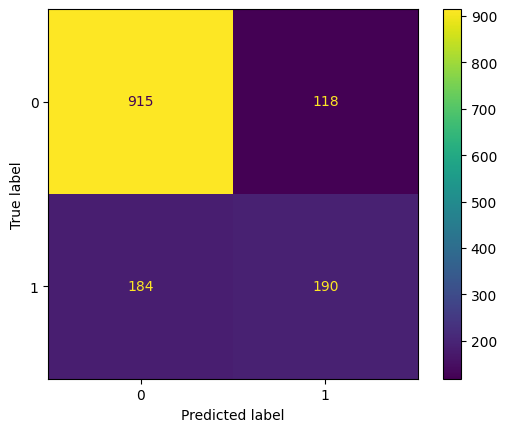

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
#import matplotlib.pyplot as plt

# training
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluation and metrics
y_preds = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_preds)}")
print(classification_report(y_test, y_preds))
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

<h4>Feature Importance to Model</h4>

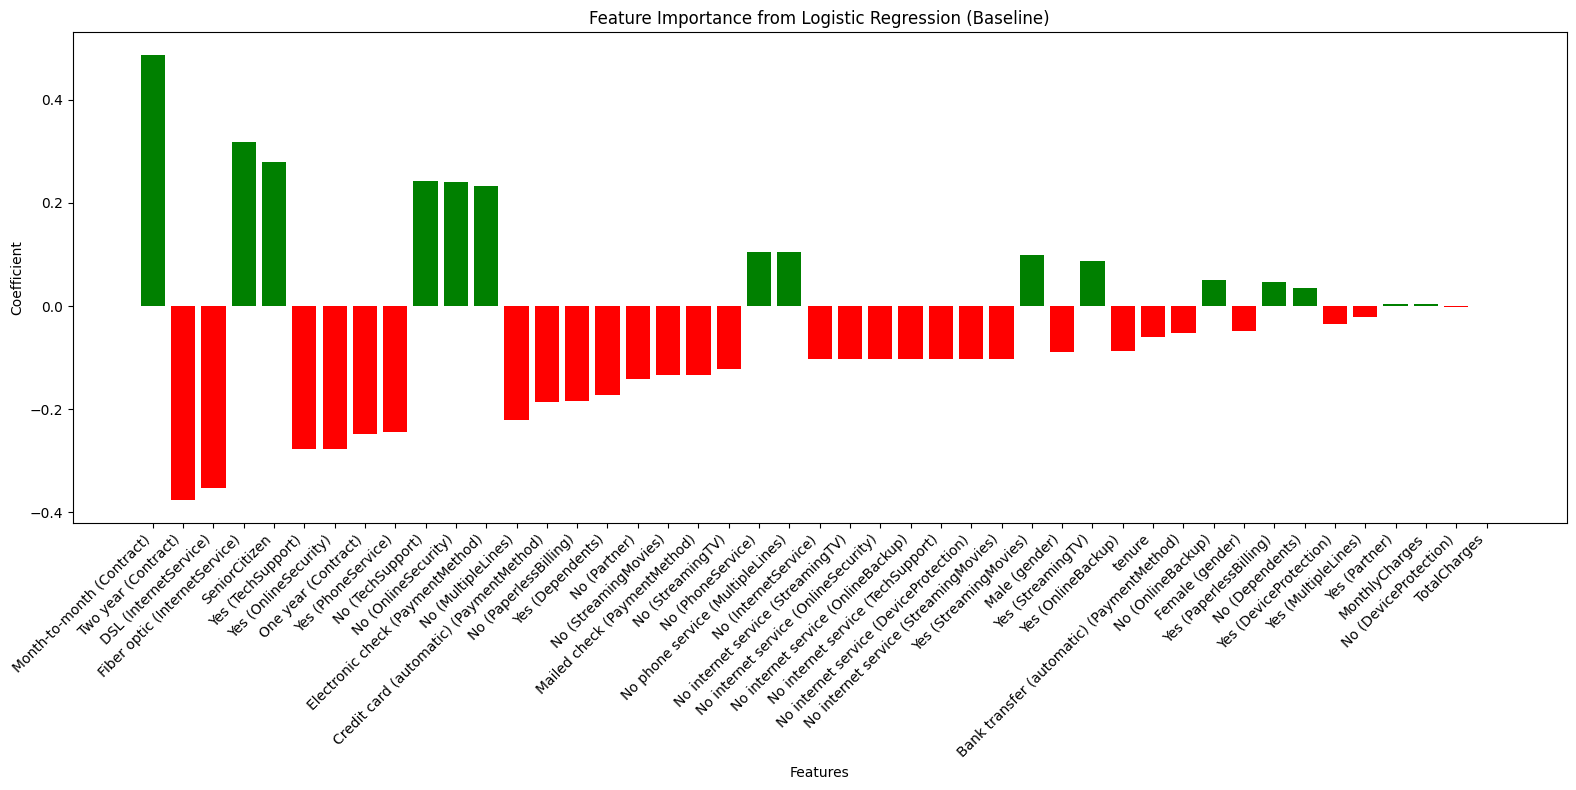

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

coefficients = model.coef_[0]
data_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': coefficients
})

# sort by absolute value
data_df = data_df.reindex(data_df['coefficient'].abs().sort_values(ascending=False).index)

# colors
colors = ['green' if c > 0 else 'red' for c in data_df['coefficient']]

plt.figure(figsize=(16,8))
plt.bar(data_df['feature'], data_df['coefficient'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Feature Importance from Logistic Regression (Baseline)")
plt.tight_layout()
plt.show()


<h5>Notes</h5>
<h6 style="color: green;">Top Features for Predicting Churn</h6>
<ol>
    <li>Month-to-Month (Contract)</li>
    <li>Fiber optic (InternetService)</li>
    <li>SeniorCitizen</li>
    <li>No (TechSupport)</li>
    <li>No (OnlineSecurity)</li>
</ol>
<h6 style="color: red;">Top Features for Predicting No-Churn</h6>
<ol>
    <li>Two Year (Contract)</li>
    <li>DSL (InternetService)</li>
    <li>Yes (TechSupport)</li>
    <li>Yes (OnlineSecurity)</li>
    <li>One year (Contract)</li>
</ol>

<h3>Logistic Regression (Class Weights)</h3>

Accuracy: 0.7377398720682303
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407



C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


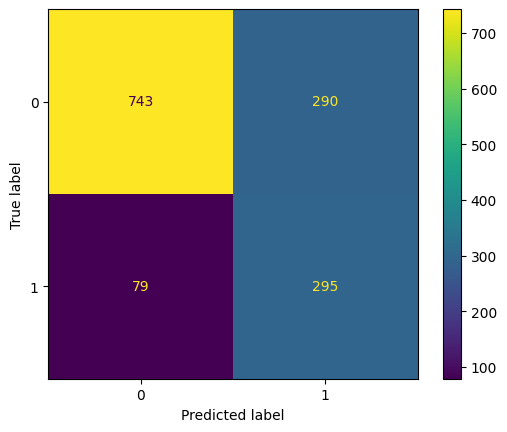

In [96]:
# training
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# evaluation and metrics
y_preds = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_preds)}")
print(classification_report(y_test, y_preds))
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

<h4>Feature Importance to Model</h4>

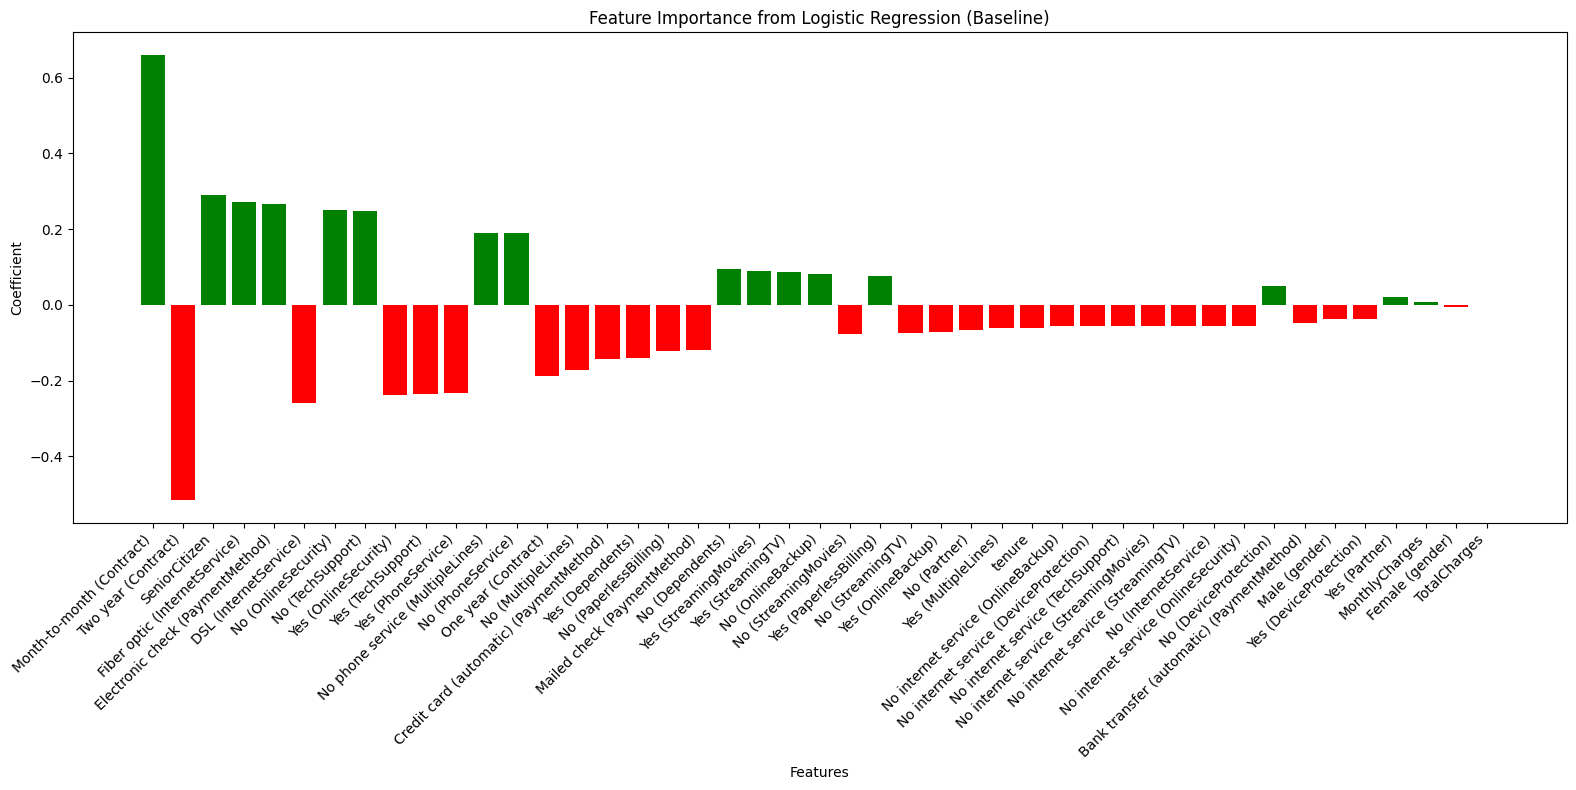

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

coefficients = model.coef_[0]
data_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': coefficients
})

# sort by absolute value
data_df = data_df.reindex(data_df['coefficient'].abs().sort_values(ascending=False).index)

# colors
colors = ['green' if c > 0 else 'red' for c in data_df['coefficient']]

plt.figure(figsize=(16,8))
plt.bar(data_df['feature'], data_df['coefficient'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Feature Importance from Logistic Regression (Baseline)")
plt.tight_layout()
plt.show()


<h5>Notes</h5>
<h6 style="color: green;">Top Features for Predicting Churn</h6>
<ol>
    <li>Month-to-Month (Contract)</li>
    <li>SeniorCitizen</li>
    <li>Fiber optic (InternetService)</li>
    <li>Electronic check (PaymentMethod)</li>
    <li>No (OnlineSecurity)</li>
</ol>
<h6 style="color: red;">Top Features for Predicting Non-Churn</h6>
<ol>
    <li>Two Year (Contract)</li>
    <li>DSL (InternetService)</li>
    <li>Yes (OnlineSecurity)</li>
    <li>Yes (TechSupport)</li>
    <li>Yes (Phone Service)</li>
</ol>

<h3>Random Forest Classifier</h3>

Accuracy: 0.7896233120113717
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



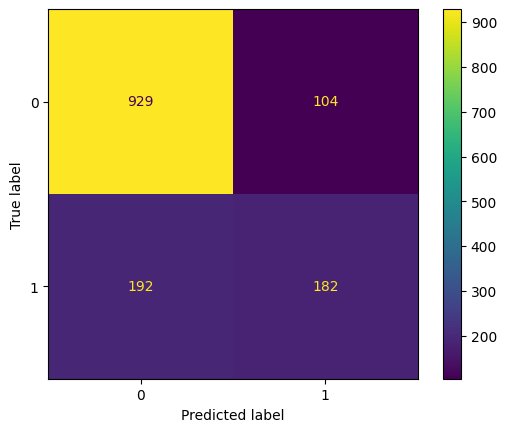

In [101]:
from sklearn.ensemble import RandomForestClassifier

# training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# evaluation and metrics
y_preds = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_preds)}")
print(classification_report(y_test, y_preds))
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

<h4>Feature Importance to Model</h4>

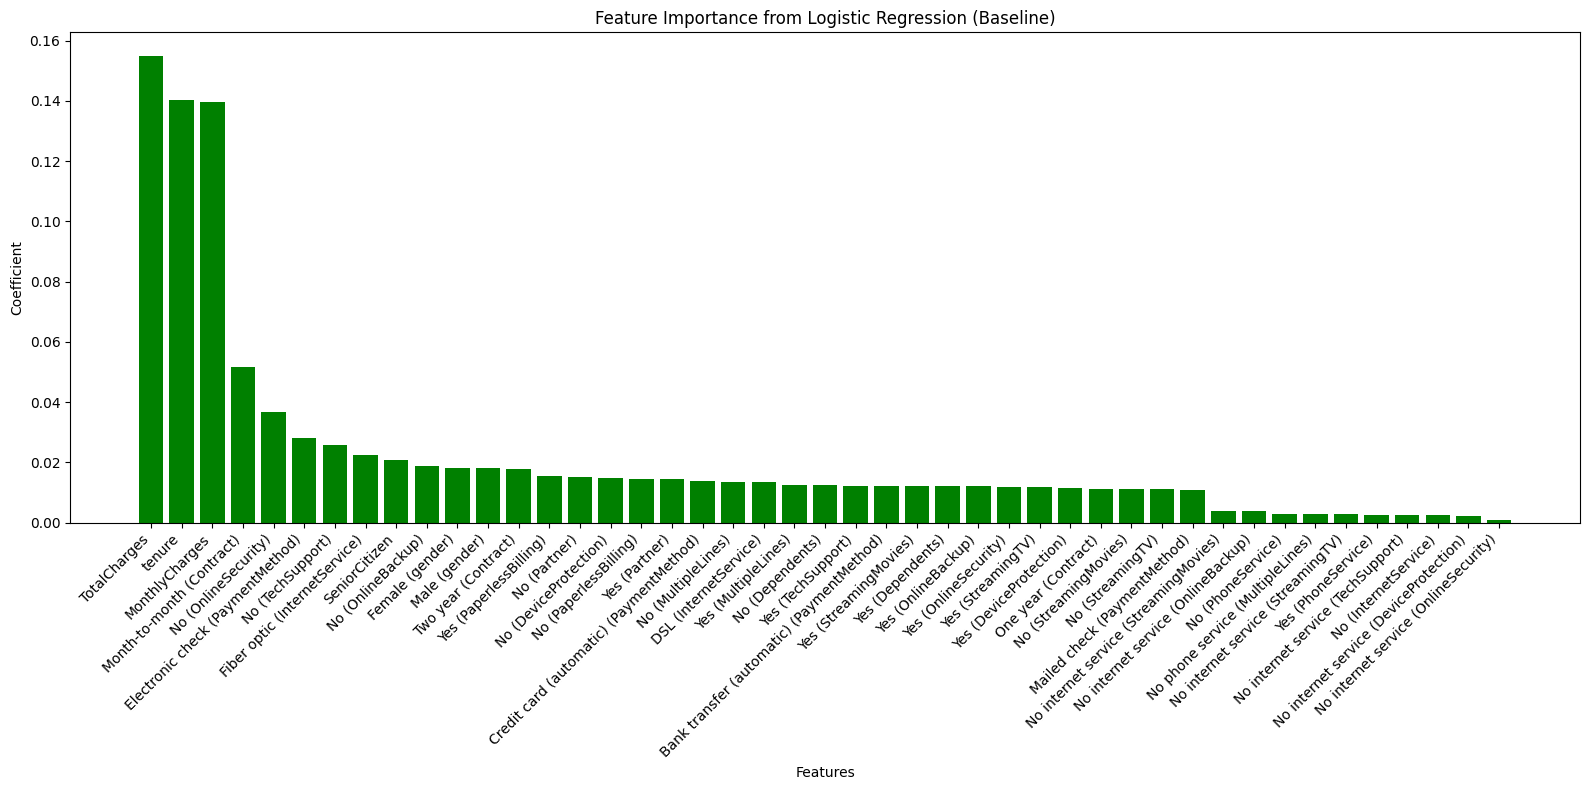

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

coefficients = model.feature_importances_
data_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': coefficients
})

# sort by absolute value
data_df = data_df.reindex(data_df['coefficient'].abs().sort_values(ascending=False).index)

# colors
colors = ['green' if c > 0 else 'red' for c in data_df['coefficient']]

plt.figure(figsize=(16,8))
plt.bar(data_df['feature'], data_df['coefficient'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Feature Importance from Logistic Regression (Baseline)")
plt.tight_layout()
plt.show()


<h2>Model Comparison Table</h2>

| Model                                | Accuracy | Recall (Churn) | Precision (Churn) | F1-score (Churn) | Notes                                               |
|-------------------------------------|----------|----------------|-------------------|------------------|-----------------------------------------------------|
| Logistic Regression (Baseline)      | 0.79     | 0.51           | 0.62              | 0.56             | Baseline linear model                               |
| Logistic Regression (Class Weights) | 0.74     | 0.79           | 0.50              | 0.62             | Recall and F1 improved; accuracy and precision lower |
| Random Forest Classifier (Baseline) | 0.78     | 0.45           | 0.61              | 0.52             | Lower recall and F1; struggles with minority class  |


<h3>Model Comparison Summary</h3>
<ul>
    <li>
        The current best-performing model is the <strong>Logistic Regression with class weights</strong>, as it achieves the highest churn recall. Since recall is the most important metric for this problem, this model is best at minimizing false negatives and identifying customers who are likely to churn.
    </li>
    <li>
        The baseline <strong>Random Forest Classifier</strong> performs the worst overall, with the lowest recall and F1-score, indicating difficulty in identifying the minority churn class without additional imbalance handling.
    </li>
    <li>
        Although the class-weighted Logistic Regression performs best in terms of recall, it has the lowest precision, meaning it predicts more false positives for churn. This reflects a trade-off between capturing churners and over-predicting churn.
    </li>
</ul>

<p><strong>Key Takeaway:</strong> Logistic Regression with class weights is currently the best model for predicting churn, as it maximizes recall and minimizes false negatives, making it most effective at identifying customers likely to leave, despite a trade-off in precision.</p>

<h2>Model Observations</h2> 
<ul> 
    <li>For the logistic regression models, <strong>TotalCharges</strong> has minimal influence, whereas in the baseline Random Forest model, it is the most important feature.</li> 
    <li>In logistic models, the features <strong>Month-to-Month (Contract)</strong>, <strong>SeniorCitizen</strong>, and <strong>No (OnlineSecurity)</strong> are the strongest predictors of customer churn.</li> 
    <li>In logistic models, the features <strong>Two Year (Contract)</strong>, <strong>DSL (InternetService)</strong>, <strong>Yes (OnlineSecurity)</strong>, and <strong>Yes (TechSupport)</strong> are most influential for predicting customers who do not churn.</li> 
    <li>For the Random Forest model, <strong>TotalCharges</strong>, <strong>tenure</strong>, and <strong>MonthlyCharges</strong> are the top features influencing predictions.</li> 
    <li>One potential limitation is the high dimensionality of the feature space (46 features), which may introduce noise and reduce the relative importance of many features, especially for linear models.</li> 
    <li>From a business perspective, this suggests retention efforts should focus on Month-to-Month contract customers and senior citizens, while understanding that monetary metrics like TotalCharges strongly drive churn prediction in non-linear models.</li> 
</ul>

<h2>Business Recommendations</h2>
<p>Based on today's analysis, customers on Month-to-Month contracts and senior citizens are the most prone to churn, according to the best-performing model so far—Logistic Regression with class weights. Conversely, customers with Two-Year contracts, DSL internet service, online security, and tech support are more likely to stay with the company. </p>

<p>Recommendations:</p>
<ul>
    <li>Target retention efforts toward high-risk groups, such as senior citizens and Month-to-Month contract holders.</li>
    <li>Enhance monthly plans to provide better value and reduce churn among at-risk customers.</li>
    <li>Promote longer-term contracts (e.g., Two-Year plans) and highlight features like DSL service, online security, and tech support as key selling points.</li>
</ul>
